## Blow up Planar DDE (Ishiwata Model)

In [1]:
using DifferentialEquations
using QuadGK
using Plots
gr()

Plots.GRBackend()

In [2]:
function bumodel(du,u,h,p,t)
  du[1] = u[1]-u[2]-h(p, t-tau)[1]*(u[1]^2+u[2]^2)
  du[2] = u[1]+u[2]-h(p, t-tau)[2]*(u[1]^2+u[2]^2)
end

bumodel (generic function with 1 method)

In [3]:
init_x(t)=-2.0
init_y(t)=-2.0

h(p, t) = [init_x(t),init_y(t)]
u0 = [init_x(0),init_y(0)]
#tspan = (tstart,tend)

tau=0.399
tau=0.3985
#tau=0.0001
lags = [tau]
tspan=(0.0,63.7)
prob = DDEProblem(bumodel,u0,h,tspan; constant_lags=lags)
    
alg = MethodOfSteps(Tsit5())
sol = solve(prob,alg,reltol=1e-6)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 833-element Array{Float64,1}:
  0.0                 
  0.01076810874729175 
  0.021836697293572405
  0.03682513259895088 
  0.05418211369264156 
  0.0753390065472618  
  0.1000651382059416  
  0.12887175218096458 
  0.1614365220226614  
  0.197733560081898   
  0.23756795262062275 
  0.2809817897115372  
  0.32800926858113033 
  ⋮                   
 63.221893137859205   
 63.2729887412405     
 63.32228892113713    
 63.369575883361414   
 63.41569400720229    
 63.462445829607326   
 63.5088684555811     
 63.55475651021158    
 63.599514194561294   
 63.64331838053231    
 63.68749627378451    
 63.7                 
u: 833-element Array{Array{Float64,1},1}:
 [-2.0, -2.0]          
 [-1.83952, -1.88128]  
 [-1.69574, -1.77797]  
 [-1.5279, -1.66162]   
 [-1.36322, -1.55267]  
 [-1.19453, -1.44736]  
 [-1.02979, -1.35173]  
 [-0.869148, -1.26639] 
 [-0.715829, -1.19305] 
 [-0.569238, -1.13071] 
 [-0.428304,

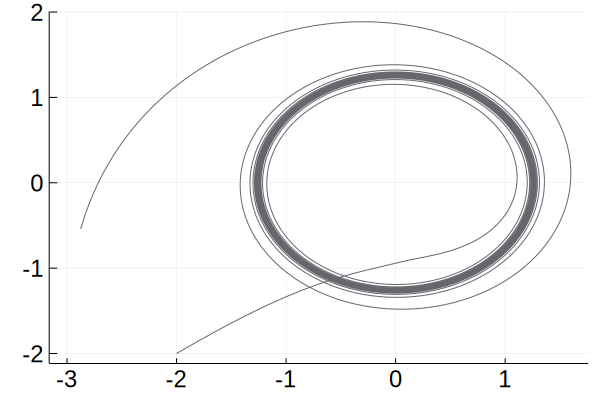

In [4]:
plot(sol,
    vars=(1,2),
    linewidth=1,
    color="#6a656d",
    xtickfont = font(16),
    ytickfont = font(16),
    label="") 

In [5]:
savefig("ishiwata.pdf")

### 巻きつく挙動を示すパラメータ 

In [6]:
init_x(t)=-2.0
init_y(t)=-2.0

tau=0.3985
tspan=(0.0,63.7)

(0.0, 63.7)

In [ ]:
anim=@animate for i=0:90
    plot(sol,
    vars=(1,2),
    linewidth=1,
    color="#6a656d",
    xtickfont = font(16),
    ytickfont = font(16)) 
    
    plot!((sol(i*0.2)[1],sol(i*0.2)[2]), 
        marker = :circle,
        markersize = 6,
        label="",
        markercolor = "#00bfff")
end
gif(anim, "bu.gif", fps = 12)